<a href="https://colab.research.google.com/github/appleaze/Computer-Vision/blob/main/Face_Verification_using_Siamense_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and Install

In [ ]:
import cv2
import os
import uuid
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
import base64
from PIL import Image
import io
import random

import numpy as np
import matplotlib.pyplot as plt
from google.colab import output

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# Folder Sturcture

In [ ]:
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

In [ ]:
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

# Collect Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#uncompress data
dataset = '/content/drive/MyDrive/Data/ComputerVision/lfw.tgz'
!tar -xf {dataset}

In [ ]:
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
      EX_PATH = os.path.join('lfw', directory, file)
      NEW_PATH = os.path.join(NEG_PATH, file)
      os.replace(EX_PATH, NEW_PATH)

In [ ]:
dataset = '/content/drive/MyDrive/Data/ComputerVision/anchor_data.zip'
!unzip -q /content/drive/MyDrive/Data/ComputerVision/anchor_data.zip -d /content/data/anchor

In [ ]:
dataset = '/content/drive/MyDrive/Data/ComputerVision/positive_data.zip'
!unzip -q /content/drive/MyDrive/Data/ComputerVision/positive_data.zip -d /content/data/positive

# Take Webcam Photos

In [ ]:
def save_photo(data, img_type):
    # Split the data to extract the base64 image data
    header, encoded = data.split(',', 1)
    image_data = base64.b64decode(encoded)
    img = Image.open(io.BytesIO(image_data))

    # Define the path based on the image type (anchor or positive)
    if img_type == 'anchor':
        img_path = os.path.join(ANC_PATH, f"{uuid.uuid1()}.jpg")
    elif img_type == 'positive':
        img_path = os.path.join(POS_PATH, f"{uuid.uuid1()}.jpg")
    else:
        print("Unknown type. Skipping save.")
        return

    # Save the image
    img.save(img_path)
    print(f"Image saved to {img_path}")

In [ ]:
def capture_photo():
    """Capture photo using the webcam and save as anchor or positive."""
    js = Javascript('''
    async function capturePhoto() {
        const div = document.createElement('div');
        const video = document.createElement('video');
        const canvas = document.createElement('canvas');
        const anchorButton = document.createElement('button');
        const positiveButton = document.createElement('button');

        // Styling for the container to allow positioning
        div.style.position = 'relative';

        // Crop area overlay
        const cropOverlay = document.createElement('div');
        cropOverlay.style.position = 'absolute';
        cropOverlay.style.border = '2px solid red';
        cropOverlay.style.pointerEvents = 'none'; // Allow interaction with video

        // Crop area dimensions
        const captureWidth = 250;
        const captureHeight = 250;

        // Style the video to maintain aspect ratio
        video.style.width = '100%';
        video.style.maxHeight = '480px'; // Adjust as needed
        video.style.objectFit = 'contain';

        // Position and size the crop overlay
        cropOverlay.style.width = `${captureWidth}px`;
        cropOverlay.style.height = `${captureHeight}px`;
        cropOverlay.style.top = '50%';
        cropOverlay.style.left = '50%';
        cropOverlay.style.transform = 'translate(-50%, -50%)';
        cropOverlay.style.boxSizing = 'border-box';

        // Button styling
        anchorButton.textContent = 'Save as Anchor (Press "a")';
        positiveButton.textContent = 'Save as Positive (Press "p")';

        // Assemble the elements
        div.appendChild(video);
        div.appendChild(cropOverlay);
        div.appendChild(anchorButton);
        div.appendChild(positiveButton);
        document.body.appendChild(div);

        // Request video stream
        const stream = await navigator.mediaDevices.getUserMedia({video: true});
        video.srcObject = stream;
        await video.play();

        // Set canvas for capture
        canvas.width = captureWidth;
        canvas.height = captureHeight;

        const capture = (type) => {
            // Get video dimensions
            const videoWidth = video.videoWidth;
            const videoHeight = video.videoHeight;

            // Calculate crop coordinates
            const cropX = (videoWidth - captureWidth) / 2;
            const cropY = (videoHeight - captureHeight) / 2;

            // Draw cropped image to canvas
            const ctx = canvas.getContext('2d');
            ctx.drawImage(
                video,
                cropX, cropY, captureWidth, captureHeight,  // Source rectangle
                0, 0, captureWidth, captureHeight  // Destination rectangle
            );

            // Stop video stream
            stream.getTracks().forEach(track => track.stop());

            // Convert and save
            const dataURL = canvas.toDataURL('image/jpeg');
            google.colab.kernel.invokeFunction('notebook.save_photo', [dataURL, type], {});
            div.remove();
        };

        // Attach event handlers
        anchorButton.onclick = () => capture('anchor');
        positiveButton.onclick = () => capture('positive');
    }
    capturePhoto();
    ''')

    display(js)

# Register the save_photo function for JavaScript to invoke
output.register_callback('notebook.save_photo', save_photo)

In [ ]:
while True:
    print("Opening webcam. Click the buttons to save images.")
    capture_photo()
    print("Press 'q' to quit or ENTER to continue.")
    user_input = input().strip().lower()
    if user_input == 'q':
        print("Exiting the program. All images saved.")
        break

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.


Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.
Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.

Opening webcam. Click the buttons to save images.


<IPython.core.display.Javascript object>

Press 'q' to quit or ENTER to continue.
q
Exiting the program. All images saved.
Image saved to data/positive/f6f24252-ba3a-11ef-b1cd-0242ac1c000c.jpg
Image saved to data/positive/f6f592f4-ba3a-11ef-b1cd-0242ac1c000c.jpg
Image saved to data/positive/f6f7f8a0-ba3a-11ef-b1cd-0242ac1c000c.jpg
Image saved to data/positive/f6fa0398-ba3a-11ef-b1cd-0242ac1c000c.jpg
Image saved to data/positive/f6fbda92-ba3a-11ef-b1cd-0242ac1c000c.jpg
Image saved to data/positive/f6fd4f26-ba3a-11ef-b1cd-0242ac1c000c.jpg
Image saved to data/positive/f6ff2b0c-ba3a-11ef-b1cd-0242ac1c000c.jpg
Image saved to data/positive/f7010eae-ba3a-11ef-b1cd-0242ac1c000c.jpg
Image saved to data/positive/f702dd56-ba3a-11ef-b1cd-0242ac1c000c.jpg
Image saved to data/positive/f7055df6-ba3a-11ef-b1cd-0242ac1c000c.jpg
Image saved to data/positive/f70718c6-ba3a-11ef-b1cd-0242ac1c000c.jpg
Image saved to data/positive/f708eef8-ba3a-11ef-b1cd-0242ac1c000c.jpg
Image saved to data/positive/f70a6c9c-ba3a-11ef-b1cd-0242ac1c000c.jpg
Image sav

In [ ]:
import shutil

# Create a zip file
shutil.make_archive('/content/anchor_data', 'zip', '/content/data/anchor')

# Download the zip file
from google.colab import files
files.download('/content/anchor_data.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

shutil.make_archive('/content/positive_data', 'zip', '/content/data/positive')

files.download('/content/positive_data.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## List Image

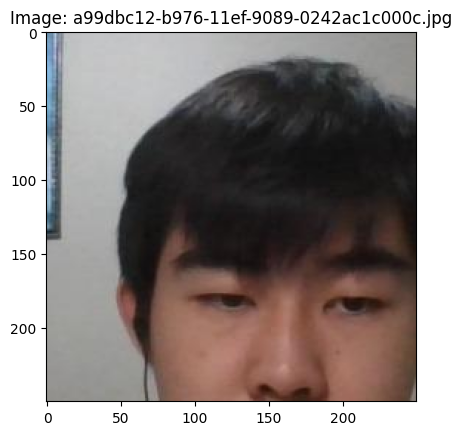

In [ ]:
image_files = [f for f in os.listdir(ANC_PATH) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Loop through the images and read them
for img_file in image_files:
    img_path = os.path.join(ANC_PATH, img_file)

    # Read the image using OpenCV
    img = cv2.imread(img_path)

    # Convert BGR to RGB for displaying using matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Show the image
    plt.imshow(img_rgb)
    plt.title(f"Image: {img_file}")
    plt.show()

In [ ]:
image_files = [f for f in os.listdir(POS_PATH) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Loop through the images and read them
for img_file in image_files:
    img_path = os.path.join(POS_PATH, img_file)

    # Read the image using OpenCV
    img = cv2.imread(img_path)

    # Convert BGR to RGB for displaying using matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Show the image
    plt.imshow(img_rgb)
    plt.title(f"Image: {img_file}")
    plt.show()

# Load Preprocess Images

In [ ]:
anchor = tf.data.Dataset.list_files(ANC_PATH + '/*.jpg').take(300)
positive = tf.data.Dataset.list_files(POS_PATH + '/*.jpg').take(300)
negative = tf.data.Dataset.list_files(NEG_PATH + '/*.jpg').take(300)

In [ ]:
dir_test = anchor.as_numpy_iterator()

In [ ]:
print(dir_test.next())

b'data/anchor/cbfa6d5a-ba34-11ef-b1cd-0242ac1c000c.jpg'


In [ ]:
def preprocess(file_path):
  byte_img = tf.io.read_file(file_path)
  img = tf.io.decode_jpeg(byte_img)
  img = tf.image.resize(img, (100, 100))
  img = img / 255.0
  return img

In [ ]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [ ]:
samples = data.as_numpy_iterator()

In [ ]:
exampple = samples.next()

In [ ]:
exampple

(b'data/anchor/5328a3e4-ba37-11ef-b1cd-0242ac1c000c.jpg',
 b'data/positive/f7daa7ea-ba3a-11ef-b1cd-0242ac1c000c.jpg',
 1.0)

In [ ]:
def preprocess_twin(input_img, validation_img, label):
  return(preprocess(input_img), preprocess(validation_img), label)

In [ ]:
res = preprocess_twin(*exampple)

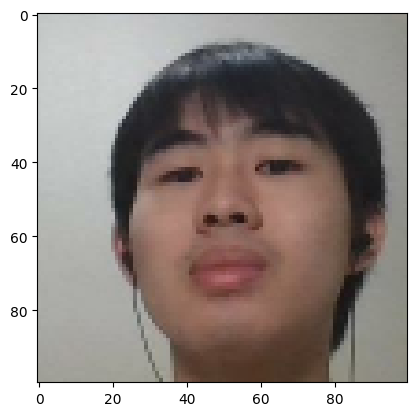

In [ ]:
plt.imshow(res[1])

In [ ]:
res[2]

1.0

In [ ]:
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024)

In [ ]:
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [ ]:
test = data.skip(round(len(data)*.7))
test = test.take(round(len(data)*.3))
test = test.batch(16)
test = test.prefetch(8)

## Test Sample

In [ ]:
samples = data.as_numpy_iterator()

In [ ]:
len(samples.next())

3

In [ ]:
samp = samples.next()

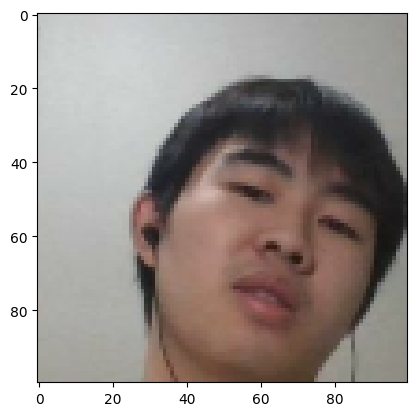

In [ ]:
plt.imshow(samples.next()[0])

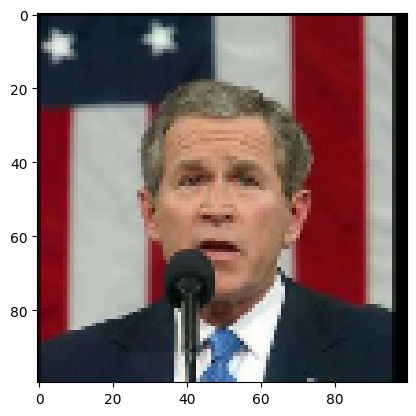

In [ ]:
plt.imshow(samples.next()[1])

In [ ]:
samp[2]

0.0

# Model Engineering

In [ ]:
def make_embedding():
  inp = Input(shape=(100, 100, 3), name='input_image')

  #first block
  c1 = Conv2D(64, (10, 10), activation='relu')(inp)
  m1 = MaxPooling2D(64, (2, 2), padding='same')(c1)

  #second block
  c2 = Conv2D(128, (7, 7), activation='relu')(m1)
  m2 = MaxPooling2D(64, (2, 2), padding='same')(c2)

  #third block
  c3 = Conv2D(128, (4,4), activation='relu')(m2)
  m3 = MaxPooling2D(64, (2, 2), padding='same')(c3)

  #Embedding
  c4 = Conv2D(256, (4,4), activation='relu')(m3)
  f1 = Flatten()(c4)
  d1 = Dense(4096, activation='sigmoid')(f1)

  return Model(inputs=[inp], outputs=[d1], name='embedding')

In [ ]:
embedding = make_embedding()

In [ ]:
embedding.summary()

Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)             │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 91, 91, 64)          │          19,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 46, 46, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 40, 40, 128)         │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 17, 17, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 256)           │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      37,752,832 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Siamese L1 Distance class
class L1Dist(Layer):

    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()

    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        # Extract the tensors from the lists
        input_embedding = input_embedding[0]
        validation_embedding = validation_embedding[0]
        return tf.math.abs(input_embedding - validation_embedding)

In [ ]:
l1 = L1Dist()

In [ ]:
def make_siamese_model():

    # Anchor image input in the network
    input_image = Input(name='input_img', shape=(100,100,3))

    # Validation image in the network
    validation_image = Input(name='validation_img', shape=(100,100,3))

    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))

    # Classification layer
    classifier = Dense(1, activation='sigmoid')(distances)

    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [ ]:
siamese_model = make_siamese_model()

In [ ]:
siamese_model.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_img (InputLayer)    │ (None, 100, 100, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ validation_img            │ (None, 100, 100, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Functional)    │ (None, 4096)           │     38,960,448 │ input_img[0][0],       │
│                           │                        │                │ validation_img[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ l1_dist_5 (L1Dist)        │ (None, 4096)           │              0 │ embedding[6][0],       │
│                           │                        │                │ embedding[7][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1)              │          4,097 │ l1_dist_5[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

# Training

In [ ]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [ ]:
opt = tf.keras.optimizers.Adam(1e-4)

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

In [ ]:
test_batch = train_data.as_numpy_iterator()

In [ ]:
batch_1 = test_batch.next()

In [ ]:
X = batch_1[:2]

In [ ]:
y = batch_1[2]

In [ ]:
y

array([0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1.],
      dtype=float32)

In [ ]:
@tf.function
def train_step(batch):

    # Record all of our operations
    with tf.GradientTape() as tape:
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]

        # Forward pass
        yhat = siamese_model(X, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)

    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)

    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))

    # Return loss
    return loss

# Trainning Loop

In [ ]:
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))

        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            train_step(batch)
            progbar.update(idx+1)

        # Save checkpoints
        if epoch % 10 == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

In [ ]:
EPOCHS = 50

In [ ]:
train(train_data, EPOCHS)


 Epoch 1/50
Tensor("binary_crossentropy/truediv:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/truediv:0", shape=(), dtype=float32)
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/stepTensor("binary_crossentropy/truediv:0", shape=(), dtype=float32)
27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 229ms/step

 Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 201ms/step

 Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 201ms/step

 Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step

 Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 203ms/step

 Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step

 Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 203ms/step

 Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step

 Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 203ms/step

 Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step

 Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 201ms/step

 Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step

 Epoch 13/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step

 Epoch 14/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 201ms/step

 E

# Evaluation

In [ ]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [ ]:
test_input, test_val, y_true = test.as_numpy_iterator().next()

In [ ]:
y_hat = siamese_model.predict([test_input, test_val])
y_hat

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[5.0487170e-09],
       [3.1568422e-07],
       [3.6163353e-08],
       [6.3364691e-10],
       [1.0000000e+00],
       [8.3297835e-10],
       [1.5027422e-11],
       [1.0000000e+00],
       [8.4440828e-09],
       [9.9997544e-01],
       [4.4533116e-04],
       [5.8243113e-08],
       [4.8504557e-08],
       [8.4453893e-07],
       [5.9687522e-10],
       [9.9899799e-01]], dtype=float32)

In [ ]:
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

[0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1]

In [ ]:
y_true

array([0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.],
      dtype=float32)

# Calculate Metrics

In [ ]:
# Creating a metric object
m = Recall()

# Calculating the recall value
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [ ]:
# Creating a metric object
m = Precision()

# Calculating the recall value
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

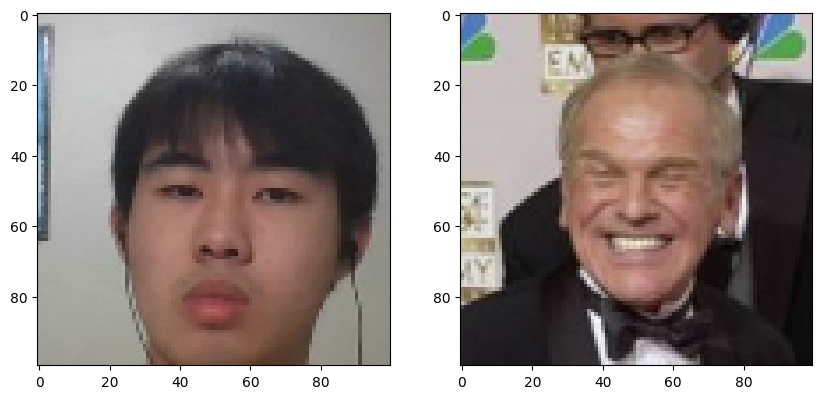

In [ ]:
# Set plot size
plt.figure(figsize=(10,8))

# Set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[0])

# Set second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[0])

# Renders cleanly
plt.show()

In [ ]:
# Save weights
siamese_model.save('siamesemodel.h5')

In [ ]:
L1Dist

SyntaxError: invalid syntax (<ipython-input-73-55777d1c677c>, line 1)

In [ ]:
model = tf.keras.models.load_model('siamesemodel.h5',
                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [ ]:
# Make predictions with reloaded model
model.predict([test_input, test_val])